# Linear regression

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
    
    # ----- Params -----

    m = 0
    b = 0
    µ = 0
    Σ = []

    α = 1
    ß = 1
    λ = 1

    wµ = 0
    wΣ = 0

    # Fit params
    w_ML = []
    w_MAP = []


    # Constructor
    def __init__(self, m, b, µ, Σ, α=1, ß=1):
        self.m = m
        self.b = b
        self.µ = µ
        self.Σ = Σ
        self.α = α
        self.ß = ß
        self.λ = self.α / self.ß



    # ----- Data generation -----

    # Linear function
    def linear_function(self, x):
        return self.m * x + self.b
    
    # Generate data
    def sample(self, min, max, N):
        '''Sample data fitting the given linear function.\n
           [min, max]: The limits of the interval from which the data is sampled.\n
           N: number of samples
        '''
        x = np.linspace(min, max, N)
        y = self.linear_function(x) + np.random.normal(self.μ, self.Σ, N)
        return np.vstack([x,y]).T
    


    # ----- Maximum Likelyhood -----

    # ML (Maximum likelihood) fit
    def fit_ML(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X]).T
        self.w_ML = np.linalg.solve(Φ.T @ Φ, Φ.T @ y)

    # ML (Maximum likelihood) estimate
    def predict_ML(self, X):
        Φ = np.vstack([np.ones(len(X)), X]).T
        return Φ @ self.w_ML



    # ----- Maximum A Posteriori -----
    
    # MAP (Maximum A Posteriori) fit
    def fit_MAP(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X]).T
        I = np.identity(2)
        self.w_MAP = np.linalg.solve(Φ.T @ Φ + self.λ * I, Φ.T @ y)

    # MAP (Maximum A Posteriori) estimate
    def predict_MAP(self, X):
        Φ = np.vstack([np.ones(len(X)), X]).T
        return Φ @ self.w_MAP
    


    # ----- Bayesian Linear Regression
    
    # w posterior
    def w_posterior(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X]).T
        I = np.identity(2)
        self.wΣ = self.ß * Φ.T @ Φ + self.α * I
        self.wμ = pow(self.wΣ, -1) @ (self.ß * Φ.T @ y)

    # Bayesian predict
    def bayesian_predict(self, X, y):
        Φ = np.vstack([np.ones(len(X)), X])
        self.w_posterior(X,y)
        return self.wΣ @ Φ, self.wμ @ Φ



    # ----- Plot -----

    # Scatter
    def scatter(self, data):
        plt.scatter(data[:,0], data[:,1], c='black')

    # Plot function
    def plot_function(self, axis):
        plt.plot(axis, self.linear_function(axis), c='grey', linestyle='--', label='{}x + {}'.format(self.m, self.b))
        plt.legend()

    # Plot predict results
    def plot_prediction(self, axis, pred, method, color):
        plt.plot(axis, pred, label= '$w^T$ φ(x) ({})'.format(method), c=color)
        plt.legend()


(50,)
(2, 50)


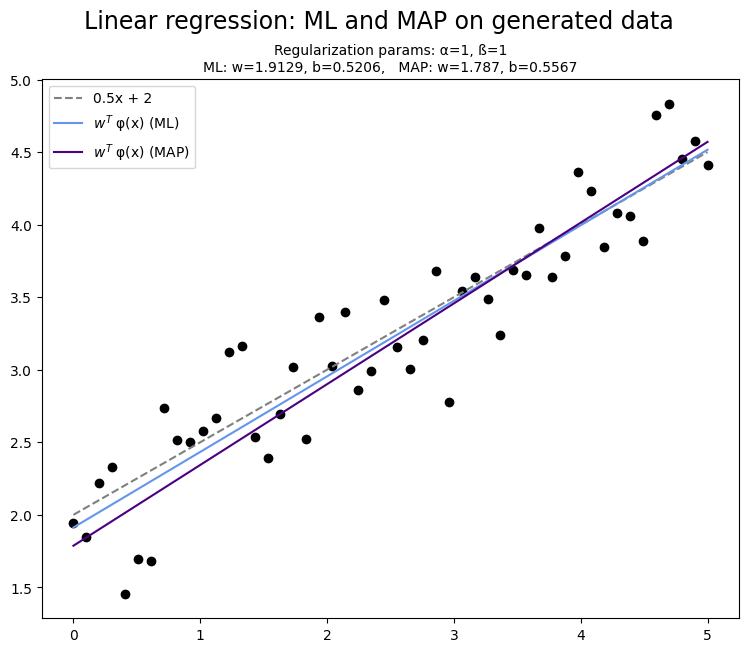

In [5]:
α = 1
ß = 1
linreg = LinearRegression(0.5, 2, 0, 0.3, α, ß)
data = linreg.sample(0,5,50)

linreg.fit_ML(data[:,0], data[:,1])
y_ML = linreg.predict_ML(data[:,0])

linreg.fit_MAP(data[:,0], data[:,1])
y_MAP = linreg.predict_MAP(data[:,0])

blr_Σ, blr_μ = linreg.bayesian_predict(data[:,0], data[:,1])

print(blr_μ.shape)
print(blr_Σ.shape)

fig = plt.figure(figsize=(9,7))
fig.suptitle('Linear regression: ML and MAP on generated data', fontsize=17)
plt.title('Regularization params: α={}, ß={}\nML: w={}, b={},   MAP: w={}, b={}'.format(α, ß, round(linreg.w_ML[0], 4), round(linreg.w_ML[1], 4), round(linreg.w_MAP[0], 4), round(linreg.w_MAP[1], 4)), fontsize=10)
linreg.scatter(data)
linreg.plot_function(data[:,0])
linreg.plot_prediction(data[:,0], y_ML, 'ML', 'cornflowerblue')
linreg.plot_prediction(data[:,0], y_MAP, 'MAP', 'indigo')